In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("../Instructor/13-Logistic-Regression/titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Titanic Data Analysis

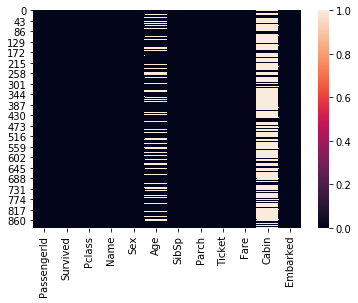

In [6]:
sns.heatmap(train.isnull())

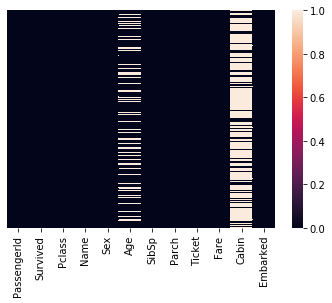

In [9]:
sns.heatmap(train.isnull(), yticklabels=False )

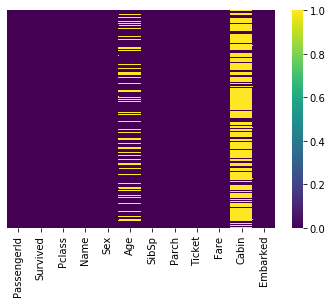

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cmap="viridis" )

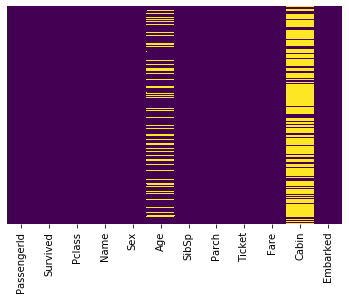

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cmap="viridis" , cbar=False)

In [12]:
sns.set_style('whitegrid')

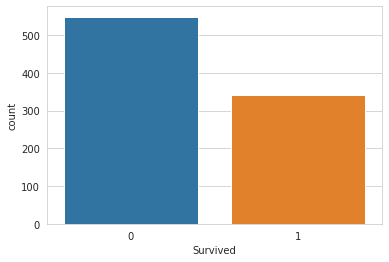

In [13]:
sns.countplot('Survived', data=train)

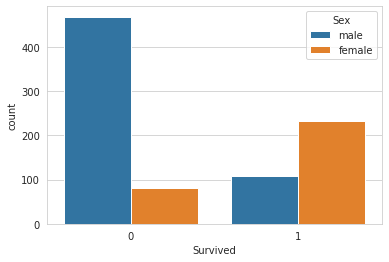

In [14]:
sns.countplot('Survived', hue='Sex', data=train)

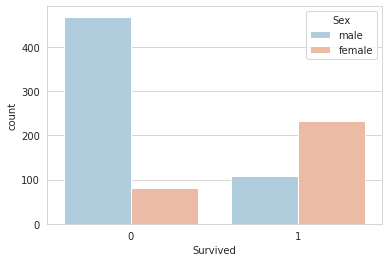

In [15]:
sns.countplot('Survived', hue='Sex', data=train, palette='RdBu_r')

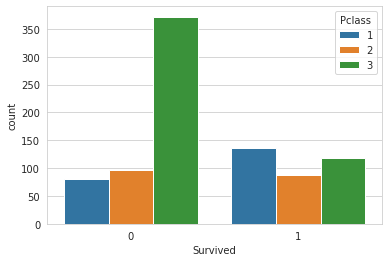

In [16]:
sns.countplot('Survived', hue='Pclass', data=train)

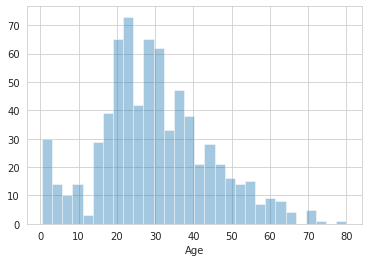

In [17]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

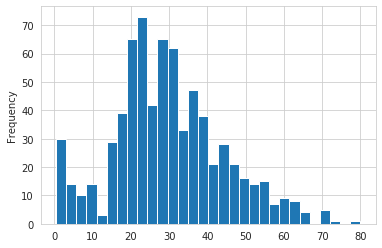

In [18]:
train['Age'].plot.hist(bins=30)

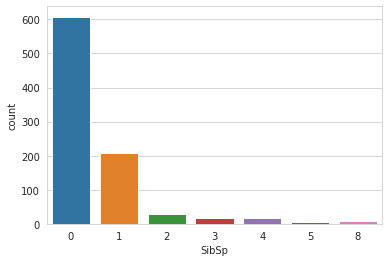

In [19]:
sns.countplot('SibSp', data=train)

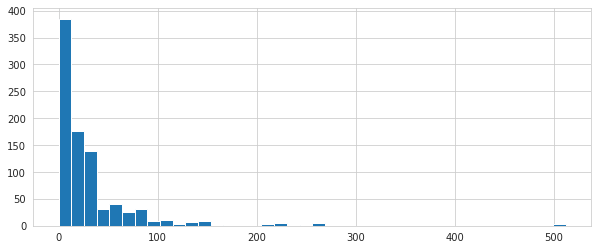

In [21]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [22]:
import cufflinks as cf

In [23]:
cf.go_offline()

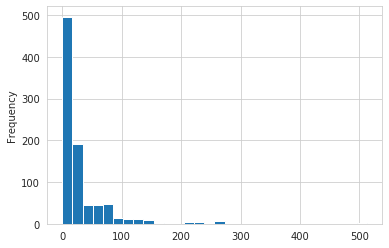

In [25]:
train['Fare'].plot(kind='hist', bins=30)

# Data Preprocessing or Data Cleaning

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [28]:
train['Age'] = train[["Age", 'Pclass']].apply(impute_age, axis=1)

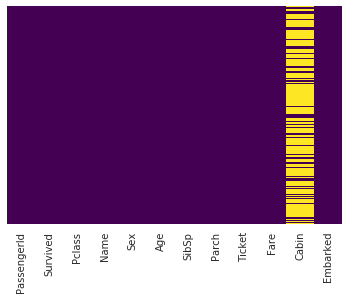

In [29]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
train.drop('Cabin', axis=1, inplace=True)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


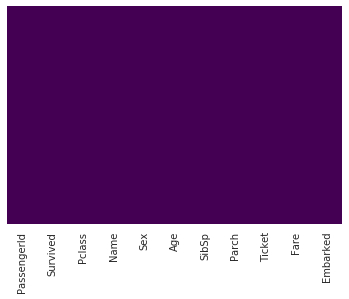

In [31]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [33]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [36]:
Embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [39]:
pd.concat([train, sex, Embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
train.drop(['Name', 'Sex','Ticket', 'Embarked'], axis=1, inplace=True)

In [43]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [44]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [45]:
y = train['Survived']
X = train.drop('Survived', axis=1)

In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(X_train, y_train)

/home/chandan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       154
           1       0.73      0.41      0.53       114

    accuracy                           0.69       268
   macro avg       0.70      0.65      0.65       268
weighted avg       0.70      0.69      0.66       268



In [61]:
confusion_matrix(y_test, predictions)

array([[137,  17],
       [ 67,  47]])